In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from ipywidgets import interact, widgets
from scipy.special import comb
from scipy.stats import binom
from scipy.special import factorial

In [2]:
%%latex
In der vorherigen Aufgabe haben wir angenommen, dass unsere Daten Poisson verteilt sind und ausgehend hiervon den Parameter $\lambda$ geschätzt. 
Allerdings haben echte Daten selten so viel 'Struktur' (warum sollten diese und jene Daten Poisson verteilt sein?). 
Angenommen wir haben irgendwelche Daten gegeben und müssen hieraus die zugrundeliegende Verteilungsfunktion bestimmen. Wie gehen wir vor?

<IPython.core.display.Latex object>

In [3]:
%%latex
Unten finden sich Daten der Körpergröße (in cm) von 131 Personen im Alter von 18 Jahren, Quelle: https://wiki.socr.umich.edu/index.php/SOCR_Data_Dinov_020108_HeightsWeights

<IPython.core.display.Latex object>

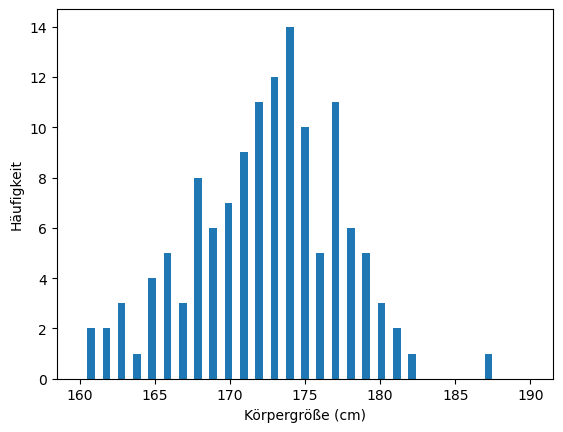

In [4]:
df=pd.read_csv("data.csv")
height=df.iloc[:,3]
plt.xlabel('Körpergröße (cm)')
plt.ylabel('Häufigkeit')
plt.hist(height, bins=np.linspace(160, 190, 60))
plt.show()


In [5]:
%%latex
Ausgehend von diesen Daten, was schätzen wir ist die Warhscheinlichkeit, dass ein 18-jähriger kleiner als 170cm ist?
Wir könnten z.B. zählen wie viele 18-jährige kleiner sind als 170cm und durch die Anzahl der 18-jährigen in unseren Daten teilen, in anderen Worten
\[
\frac{1}{131}\sum_{k=1}^{131} \mathbb{1}_{(-\infty, 170]}(X_i)=F_{131}(170)
\]
Allgemeiner, falls wir $n$ Datenpunkte gegeben haben würden wir die Wahrscheinlichkeit, dass ein 18-jähriger kleiner ist als $x-cm$ mittels des Schätzers
\[
F_n(x)=\frac{1}{n}\sum_{i=1}^n \mathbb{1}_{(-\infty, x]}(X_i)
\]

<IPython.core.display.Latex object>

In [14]:
def empi(he):
    height2=height[height<he]
    p=round(len(height2)/len(height), 2)
    plt.xlabel('Körpergröße (cm)')
    plt.ylabel('Häufigkeit')
    plt.hist(height2, np.linspace(160, 190, 60), alpha=1, label=f'W-Keit kleiner als {he} ist {p}')
    plt.hist(height, np.linspace(160, 190, 60), alpha=0.3)
    plt.legend()
    plt.show()

slider=widgets.IntSlider(value=170, min=160, max=190, description='Kleiner als', description_width='auto', orientation='horizontal', layout=widgets.Layout(width='500px'), readout=True)
interact(empi, he=slider)




interactive(children=(IntSlider(value=170, description='Kleiner als', layout=Layout(width='500px'), max=190, m…

<function __main__.empi(he)>